# 一般线性模型
## 单个变量

In [109]:
from sklearn import linear_model
import NormalRegression as reg
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import cluster 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

#生成随机数据集合
def createdata1(beta,sigma,x_min,x_max,n):
    epsilon=np.random.normal(loc=0.0, scale=sigma,size=n)
    raw_x=np.random.normal(loc=(x_min+x_max)/2,scale=(x_min+x_max)**0.65,size=100*n)
    x=np.random.choice(raw_x,n)
    y=beta*x
    y+=epsilon
    
    return x,y

def cal_SSQ(beta,intercept,X,Y):
    ssq=0
    for (x,y) in zip(X,Y):
        ssq+=(y-beta*x)**2
    return float(ssq)

In [36]:
time_cost=[]
SSQ=[]
Beta=[]

Beta2=[]
SSQ2=[]

Beta3=[]
SSQ3=[]

SSQ4=[]

Intercept=[]

x_max=100
size_max=500

clf1 = linear_model.LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=1)
k=5

beta_con=0.5
sigma=20
intercept=0

X,Y=createdata1(beta_con,sigma,0,100,int(size_max/k))
X=X.reshape((len(X),1))

model=clf1.fit(X,Y)
Beta.append(model.coef_[0])
Intercept.append(model.intercept_)
SSQ.append(cal_SSQ(model.coef_[0],model.intercept_,X,Y))   



beta,s2=reg.Reg(X,Y)
Beta2.append(beta[0])
SSQ2.append(s2)
B=reg.getB(X)
Z=reg.getZ(X,Y)

beta2,s22=reg.Reg(X,Y)
Beta3.append(beta2[0])
SSQ3.append(s22)
SSQ4.append(s22)


for i in range(k):
#     start=time.time()
    a=random.random()*20-10
    X_temp,Y_temp=createdata1(beta_con,sigma,0+a,100+a,int(size_max/k))
    X_temp=X_temp.reshape((len(X_temp),1))
    
    X=np.row_stack((X,X_temp))
    Y=np.append(Y,Y_temp)
    
    model=clf1.fit(X,Y)
    Beta.append(model.coef_[0])
    Intercept.append(model.intercept_)
    
    B_inv=np.linalg.inv(B)
    
    beta=reg.StreamReg(X_temp,Y_temp,beta,B_inv)
    s2=reg.StreamEst(X_temp,Y_temp,s2,B_inv,Z)
    Beta2.append(beta[0])
    SSQ2.append(s2)
    B=reg.getB_new(X_temp,B)
    Z=reg.getZ_new(X_temp,Y_temp,Z)
    
    #num+=X_temp[i].shape[0]
    
    beta2,s22=reg.Reg(X,Y)
    Beta3.append(beta2[0])
    SSQ3.append(s22)
    
    cal_SSQ(model.coef_[0],model.intercept_,X,Y)
    
    
    SSQ4.append(cal_SSQ(beta[0],0,X,Y))   

#     end=time.time()
#     time_cost.append(start-end)
    SSQ.append(cal_SSQ(model.coef_[0],model.intercept_,X,Y))   

In [31]:
SSQ11=np.zeros(len(SSQ))
SSQ22=np.zeros(len(SSQ2))

In [37]:
SSQ11=SSQ11+1/3*np.array(SSQ)
SSQ22=SSQ22+1/3*np.array(SSQ2)

<function matplotlib.pyplot.show(*args, **kw)>

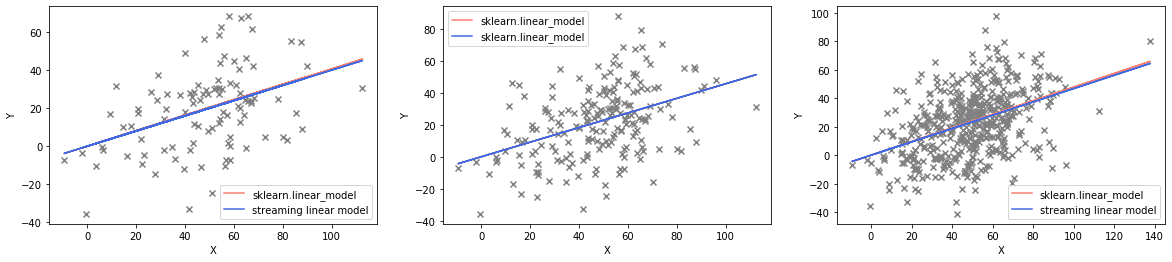

In [9]:
plt.figure(figsize=(20,4))

kk1=100
plt.subplot(131)
plt.scatter(X[0:kk1],Y[0:kk1],color='grey',marker='x')
plt.plot(X[0:kk1],Beta[0]*X[0:kk1],color='salmon',label='sklearn.linear_model')
plt.plot(X[0:kk1],Beta2[0]*X[0:kk1],color='royalblue',label='streaming linear model')
plt.xlabel('X')
plt.ylabel('Y')
#plt.xticks([])
#plt.yticks([])
plt.legend()

kk2=200
plt.subplot(132)
plt.scatter(X[0:kk2],Y[0:kk2],color='grey',marker='x')
plt.plot(X[0:kk2],Beta[1]*X[0:kk2],color='salmon',label='sklearn.linear_model')
plt.plot(X[0:kk2],Beta2[1]*X[0:kk2],color='royalblue',label='sklearn.linear_model')
plt.xlabel('X')
plt.ylabel('Y')
#plt.xticks([])
#plt.yticks([])
plt.legend()

kk3=500
plt.subplot(133)
plt.scatter(X[0:kk3],Y[0:kk3],color='grey',marker='x')
plt.plot(X[0:kk3],Beta[4]*X[0:kk3],color='salmon',label='sklearn.linear_model')
plt.plot(X[0:kk3],Beta2[4]*X[0:kk3],color='royalblue',label='streaming linear model')
plt.xlabel('X')
plt.ylabel('Y')
#plt.xticks([])
#plt.yticks([])

plt.legend(loc='lower right')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

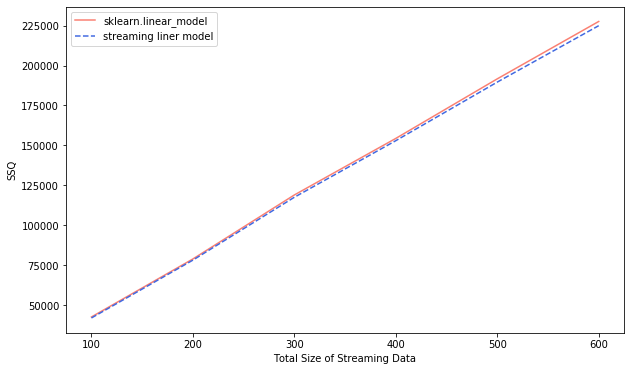

In [38]:
plt.figure(figsize=(10,6))

stream=np.arange(len(SSQ))*100+100

plt.plot(stream,SSQ11,color='salmon',label='sklearn.linear_model')
plt.plot(stream,SSQ22,color='royalblue',label='streaming liner model',linestyle='--')
#plt.plot(stream,SSQ4,color='royalblue',label='streaming liner model',linestyle='--')
plt.xlabel('Total Size of Streaming Data')
plt.ylabel('SSQ')
plt.legend()

plt.legend()

plt.show

In [28]:
cal_SSQ(model.coef_[0],model.intercept_,X,Y)

array([247752.96149661])

## 多个变量

In [110]:
def createdata2(beta,sigma,x_min,x_max,n,dim):
    
    X=np.zeros(shape=(n,dim))
    Y=np.zeros(n)
    for i in range(dim):
        fil=np.random.random()
        epsilon=np.random.normal(loc=0.0, scale=sigma,size=n)
        raw_x=np.random.normal(loc=(x_min+x_max)/2,scale=(x_min+x_max),size=100*n)
        x=np.random.choice(raw_x,n)
        x=fil*x

        X[:,i]=x
        Y+=beta[i]*x
    Y+=epsilon
    return X,Y

def cal_SSQ2(beta,intercept,X,Y):
    ssq=0
    for (x,y) in zip(X,Y):
        ssq+=(y-np.dot(beta,x))**2
    return ssq

In [111]:
dim=100
N=10000
k=100
n=int(N/k)

X=np.zeros(shape=(n,dim))
Y=np.zeros(n)

beta_con=np.random.randint(1,5,size=dim)
sigma_con=30

a=1

x_min=0
x_max=1000

SSQ1=[]
timecost1=[]
clf1 = linear_model.LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=1)

for i in range(k):
    #print(i)
    X_temp,Y_temp=createdata2(beta_con,sigma_con,x_min,x_max,n,dim)
    start=time.time()
    if a==1:
        X=X_temp
        Y=Y_temp
        a=0
    else:
        X=np.row_stack((X,X_temp))
        Y=np.append(Y,Y_temp)
        
    model=clf1.fit(X,Y)
    SSQ1.append(cal_SSQ2(model.coef_,0,X,Y))
    
    end=time.time()
    timecost1.append(end-start)

    
Total_time_start=time.time()
    

SSQ2=[]
timecost2=[]

start=time.time()

beta_con=np.random.randint(1,5,size=dim)
sigma_con=10

X1=X[0:n]
Y1=Y[0:n]
B=reg.getB(X1)
Z=reg.getZ(X1,Y1)
beta,s2=reg.Reg(X1,Y1)

end=time.time()

SSQ2.append(s2)
timecost2.append(end-start)
num=X.shape[0]

for i in range(1,k):
    #print(i)
    X_temp=X[i*n:(i+1)*n]
    Y_temp=Y[i*n:(i+1)*n]
    start=time.time()
    B_inv=np.linalg.inv(B)
    
    beta=reg.StreamReg(X_temp,Y_temp,beta,B_inv)
    s2=reg.StreamEst(X_temp,Y_temp,s2,B_inv,Z)
    
    #print(s2)
    B=reg.getB_new(X_temp,B)
    Z=reg.getZ_new(X_temp,Y_temp,Z)
    
    num+=X_temp[i].shape[0]
    end=time.time()
    
    SSQ2.append(s2)
    timecost2.append(end-start)
    
Total_time_end=time.time()
print(Total_time_end-Total_time_start)

0.13189291954040527


In [42]:
SSQ11=np.zeros(len(SSQ1))
SSQ22=np.zeros(len(SSQ2))

In [43]:
SSQ11=SSQ11+1/3*np.array(SSQ1)
SSQ22=SSQ22+1/3*np.array(SSQ2)

<function matplotlib.pyplot.show(*args, **kw)>

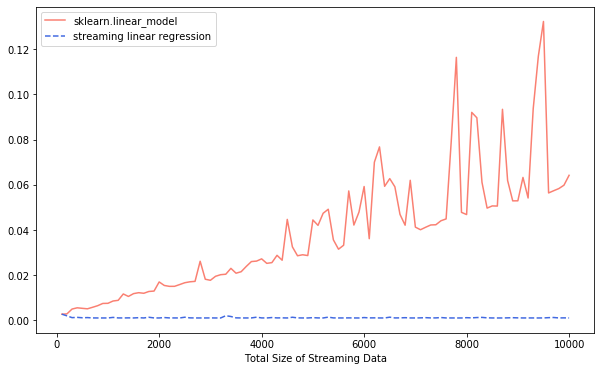

In [120]:
plt.figure(figsize=(10,6))

timecost2[0]=timecost1[0]
stream=np.arange(len(timecost1))*n+n
plt.plot(stream,timecost1,color='salmon',label='sklearn.linear_model')
plt.plot(stream,timecost2,color='royalblue',linestyle='--',label='streaming linear regression')

plt.xlabel('Total Size of Streaming Data')
plt.legend()
#plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

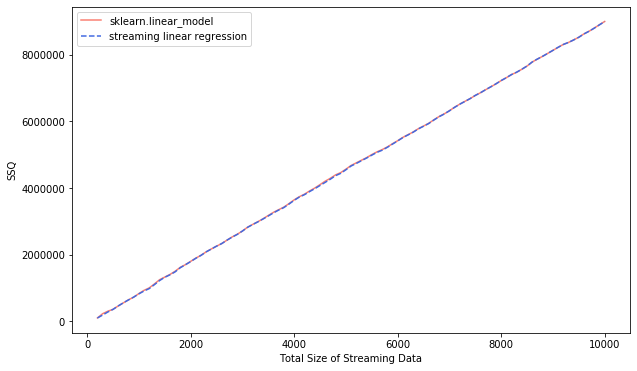

In [114]:
plt.figure(figsize=(10,6))

stream=np.arange(len(timecost1))*n+n
plt.plot(stream[1:],SSQ1[1:],color='salmon',label='sklearn.linear_model')
plt.plot(stream[1:],SSQ2[1:],color='royalblue',linestyle='--',label='streaming linear regression')

plt.xlabel('Total Size of Streaming Data')
plt.ylabel('SSQ')
plt.legend()
#plt.yticks([])
plt.show

# 逻辑回归

In [86]:
import StreamingLogit as lr
import numpy as np

from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import time

In [87]:
def makeY(X,Y):
    tmp=np.sum(X,axis=1)
    Y[tmp>0.1]=1
    
    return Y

def createdata3(n,dim):
    
    X=np.zeros(shape=(n,dim))
    Y=np.zeros(n)
    for i in range(dim):
        x=np.random.normal(loc=0.0,scale=10.0,size=n)

        X[:,i]=x
        Y=makeY(X,Y)
    #产生一些噪音
    noisenum=int(n*np.random.random()*0.1)
    nosie=np.random.randint(len(Y),size=noisenum)
    Y[nosie]=1-Y[nosie]
    
    return X,Y
    
def cost_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_model(X, theta):
    return cost_sigmoid(np.dot(X, theta.T))

def cost(X, y, theta):
    left = np.multiply(-y, np.log(cost_model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - cost_model(X, theta)))
    return np.sum(left - right) / (len(X))

In [89]:
n=100
N=10000
dim=1

Beta1=[]
Beta2=[]
Beta3=[]
timecost1=[]#IRWLS
timecost2=[]#Streaming IRWLS
timecost3=[]#sklearn.LogisticRegression

start=time.time()

X,Y=createdata3(n,dim)

clf = LogisticRegression(random_state=0, C=1e5,solver='sag',max_iter=2000,multi_class='ovr')
model = clf.fit(X, Y)

Beta3.append(model.coef_[0])
end=time.time()
timecost3.append(end-start)

beta=model.coef_[0]
nsigma=0

n,col=X.shape
S_zz=[]
S_xz=[]
S_xx=[]
max_iter=5

beta, nsigma, S_zz, S_xz, S_xx=lr.streamingIRWLS_init(beta,X,Y,S_zz,S_xz,S_xx,max_iter)
Beta2.append(beta)
Beta1.append(beta)

end=time.time()
timecost1.append(end-start)
timecost2.append(end-start)

for i in range(int(N/n)):
    X_tmp,Y_tmp=createdata3(n,dim)
    X=np.row_stack((X,X_tmp))
    Y=np.append(Y,Y_tmp)
    
    s_zz=[]
    s_xz=[]
    s_xx=[]
    nsigma_t=0
    
    start=time.time()
    model = clf.fit(X, Y)
    beta_1=model.coef_[0]
    end=time.time() 
    Beta3.append(beta_1)
    timecost3.append(end-start)
    
    beta_1, nsigma_t, s_zz, s_xz, s_xx=lr.streamingIRWLS_init(beta,X,Y,s_zz,s_xz,s_xx,max_iter)
    end=time.time() 
    Beta1.append(beta_1)
    timecost1.append(end-start)
    
    start=time.time()
    beta, nsigma, S_zz, S_xz, S_xx = lr.streamingIRWLS(beta, X_tmp, Y_tmp, S_zz, S_xz, S_xx,max_iter)
    Beta2.append(beta)
    end=time.time()
    timecost2.append(end-start)

In [103]:
#多次取平均
n=100
N=10000
dim=1
timecost11=np.zeros(1)
timecost22=np.zeros(1)
a1=np.zeros(1)
b1=np.zeros(1)
a=[]
b=[]
c=[]

for mm in range(3):

    Beta1=[]
    Beta2=[]
    Beta3=[]
    timecost1=[]#IRWLS
    timecost2=[]#Streaming IRWLS
    timecost3=[]#sklearn.LogisticRegression

    start=time.time()

    X,Y=createdata3(n,dim)

    clf = LogisticRegression(random_state=0, C=1e5,solver='sag',max_iter=2000,multi_class='ovr')
    model = clf.fit(X, Y)

    Beta3.append(model.coef_[0])
    end=time.time()
    timecost3.append(end-start)

    beta=model.coef_[0]
    nsigma=0

    n,col=X.shape
    S_zz=[]
    S_xz=[]
    S_xx=[]
    max_iter=5

    beta, nsigma, S_zz, S_xz, S_xx=lr.streamingIRWLS_init(beta,X,Y,S_zz,S_xz,S_xx,max_iter)
    Beta2.append(beta)
    Beta1.append(beta)

    end=time.time()
    timecost1.append(end-start)
    timecost2.append(end-start)

    for i in range(int(N/n)):
        X_tmp,Y_tmp=createdata3(n,dim)
        X=np.row_stack((X,X_tmp))
        Y=np.append(Y,Y_tmp)

        s_zz=[]
        s_xz=[]
        s_xx=[]
        nsigma_t=0

        start=time.time()
        model = clf.fit(X, Y)
        beta_1=model.coef_[0]
        end=time.time() 
        Beta3.append(beta_1)
        timecost3.append(end-start)

        beta_1, nsigma_t, s_zz, s_xz, s_xx=lr.streamingIRWLS_init(beta,X,Y,s_zz,s_xz,s_xx,max_iter)
        end=time.time() 
        Beta1.append(beta_1)
        timecost1.append(end-start)

        start=time.time()
        beta, nsigma, S_zz, S_xz, S_xx = lr.streamingIRWLS(beta, X_tmp, Y_tmp, S_zz, S_xz, S_xx,max_iter)
        Beta2.append(beta)
        end=time.time()
        timecost2.append(end-start)
        
        a=[]
        b=[]
        c=[]
        for i in range(len(Beta1)-1):
            a.append(cost(X,Y,Beta1[i]))
            b.append(cost(X,Y,Beta2[i]))
            c.append(cost(X,Y,Beta3[i]))
        
        #print(len(timecost1))
    if timecost11.shape[0]<len(timecost1):    
        timecost11=np.array(timecost1)/3
        timecost22=np.array(timecost2)/3
    else:
        timecost11+=np.array(timecost1)/3
        timecost22+=np.array(timecost2)/3
    
    if a1.shape[0]<len(a):
        a1=np.array(a)/3
        b1=np.array(b)/3
    else:
        a1+=np.array(a)/3
        b1+=np.array(b)/3      

<function matplotlib.pyplot.show(*args, **kw)>

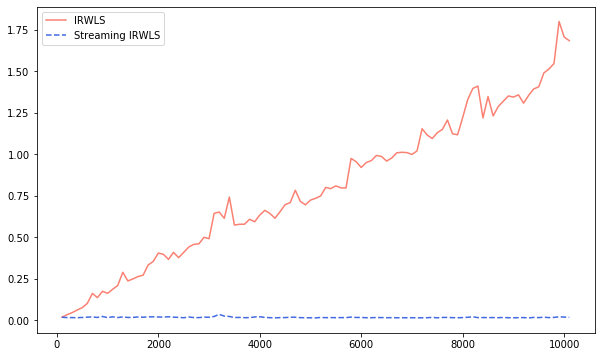

In [104]:
plt.figure(figsize=(10,6))


stream=np.arange(len(timecost1))*n+n
plt.plot(stream,timecost11,color='salmon',label='IRWLS')
plt.plot(stream,timecost22,color='royalblue',linestyle='--',label='Streaming IRWLS')
#plt.plot(stream,timecost3,color='olive',linestyle=':',label='sklearn.LogisticRegression')

plt.legend()
plt.show

In [130]:
a=cost(X, Y,Beta1[len(Beta1)-1])
b=cost(X,Y,Beta2[len(Beta2)-1])
c=a=cost(X,Y,Beta3[len(Beta3)-1])
print(a)
print(b)
print(c)

0.3075761430316318
0.3076544174310635
0.3075761430316318


<function matplotlib.pyplot.show(*args, **kw)>

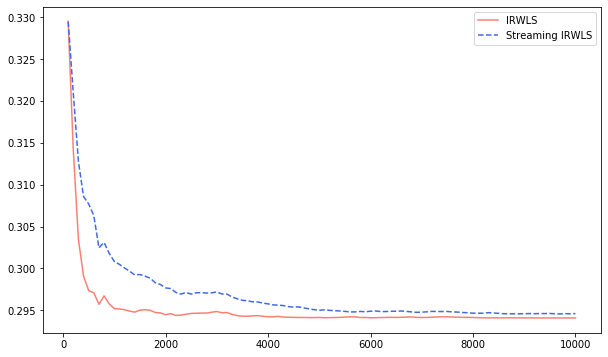

In [105]:
a=[]
b=[]
c=[]
for i in range(len(Beta1)-1):
    a.append(cost(X, Y,Beta1[i]))
    b.append(cost(X,Y,Beta2[i]))
    c.append(cost(X,Y,Beta3[i]))
    
stream=np.arange(len(a))*n+n

plt.figure(figsize=(10,6))
plt.plot(stream,a1,color='salmon',label='IRWLS')
plt.plot(stream,b1,color='royalblue',linestyle='--',label='Streaming IRWLS')
#plt.plot(stream,c,color='olive',linestyle=':',label='sklearn.LogisticRegression')

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

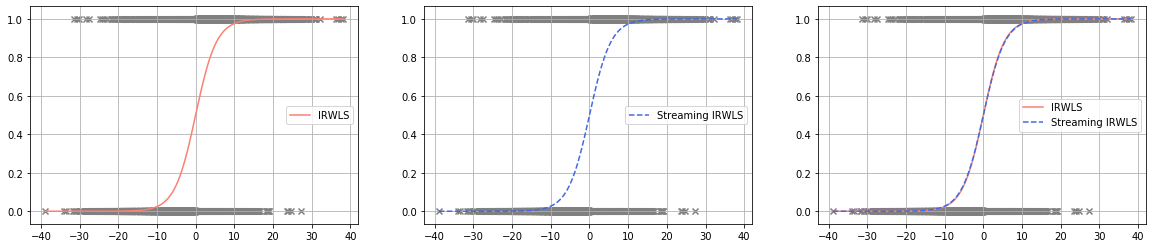

In [155]:
plt.figure(figsize=(20,4))

x=np.arange(np.min(X),np.max(X),0.1)
aa=Beta1[len(Beta1)-1][0]
bb=Beta2[len(Beta2)-1][0]
y1=cost_sigmoid(x*aa)
y2=cost_sigmoid(x*bb)


plt.subplot(131)
plt.scatter(X[tmp],Y[tmp],color='grey',marker='x')
plt.plot(x,y1,color='salmon',label='IRWLS')
plt.legend()
plt.grid()

plt.subplot(132)
tmp=np.argsort(X[:,0])
plt.scatter(X[tmp],Y[tmp],color='grey',marker='x')
plt.plot(x,y2,color='royalblue',linestyle='--',label='Streaming IRWLS')
plt.legend()
plt.grid()

plt.subplot(133)
tmp=np.argsort(X[:,0])
plt.scatter(X[tmp],Y[tmp],color='grey',marker='x')
plt.plot(x,y1,color='salmon',label='IRWLS')
plt.plot(x,y2,color='royalblue',linestyle='--',label='Streaming IRWLS')
plt.legend()
plt.grid()

plt.show

# 分类

In [330]:
def createdata3(N):
    
    x1=np.array([-5,0])
    x2=np.array([5,5])
    x3=np.array([5,-5])
    
    n=N+int(np.random.random()*N-N/2)
    e1=np.random.randn(n,2)*1.4
    y1=np.ones(len(e1))*0
    
    n=N+int(np.random.random()*N-N/2)
    e2=np.random.randn(n,2)*1.4
    y2=np.ones(len(e2))*1
    
    n=N+int(np.random.random()*N-N/2)
    e3=np.random.randn(n,2)*1.4
    y3=np.ones(len(e3))*2
    
    X=x1+e1
    X=np.row_stack((X,x2+e2))
    X=np.row_stack((X,x3+e3))
    
    Y=np.append(y1,y2)
    Y=np.append(Y,y3)
    
    e=np.random.randint(0,len(Y),int(N*0.2))
    Y[e]=np.random.randint(0,3,size=len(e))
    
    return X,Y

def createdata4(N):
    
    x1=np.array([13,0])
    x2=np.array([-5,0])
    x3=np.array([5,-5])
    
    n=N+int(np.random.random()*N-N/2)
    e1=np.random.randn(n,2)*1.4
    y1=np.ones(len(e1))*0
    
    n=N+int(np.random.random()*N-N/2)
    e2=np.random.randn(n,2)*1.4
    y2=np.ones(len(e2))*1
    
    n=N+int(np.random.random()*N-N/2)
    e3=np.random.randn(n,2)*1.4
    y3=np.ones(len(e3))*2
    
    X=x1+e1
    X=np.row_stack((X,x2+e2))
    X=np.row_stack((X,x3+e3))
    
    Y=np.append(y1,y2)
    Y=np.append(Y,y3)
    
    e=np.random.randint(0,len(Y),int(N*0.5))
    Y[e]=np.random.randint(0,3)
    
    return X,Y

def createdata5(N):
    
    x1=np.array([-4,4])
    x2=np.array([5,-3])
    x3=np.array([5,0])
    
    n=N+int(np.random.random()*N-N/2)
    e1=np.random.randn(n,2)*1.4
    y1=np.ones(len(e1))*0
    
    n=N+int(np.random.random()*N-N/2)
    e2=np.random.randn(n,2)*1.4
    y2=np.ones(len(e2))*1
    
    n=N+int(np.random.random()*N-N/2)
    e3=np.random.randn(n,2)*1.4
    y3=np.ones(len(e3))*2
    
    X=x1+e1
    X=np.row_stack((X,x2+e2))
    X=np.row_stack((X,x3+e3))
    
    Y=np.append(y1,y2)
    Y=np.append(Y,y3)
    
    e=np.random.randint(0,len(Y),int(N*0.5))
    Y[e]=np.random.randint(0,3)
    
    return X,Y

def createdata6(N):
    
    x1=np.array([2,-5])
    x2=np.array([3,3])
    x3=np.array([4,-7])
    
    n=N+int(np.random.random()*N-N/2)
    e1=np.random.randn(n,2)*1.4
    y1=np.ones(len(e1))*0
    
    n=N+int(np.random.random()*N-N/2)
    e2=np.random.randn(n,2)*1.4
    y2=np.ones(len(e2))*1
    
    n=N+int(np.random.random()*N-N/2)
    e3=np.random.randn(n,2)*1.4
    y3=np.ones(len(e3))*2
    
    X=x1+e1
    X=np.row_stack((X,x2+e2))
    X=np.row_stack((X,x3+e3))
    
    Y=np.append(y1,y2)
    Y=np.append(Y,y3)
    
    e=np.random.randint(0,len(Y),int(N*0.5))
    Y[e]=np.random.randint(0,3)
    
    return X,Y

def accuracyRate(X,y,tree):
    count=0
    pre=tree.predict(X)
    
    for p,yy in zip(pre,y):
        if p==yy:
            count+=1
    return count/X.shape[0]

def purneTree(X,y,treelist,cap):
    if len(treelist)<=cap:
        return treelist
    
    accuracyRatelist=[]
    for tree in treelist:
         accuracyRatelist.append(accuracyRate(X,y,tree))
            
    dlnum=np.argmin(accuracyRatelist)
    del treelist[dlnum]
    return treelist

def ensemblepredict(X,Y,treelist):
    
    prelist=np.ones(len(Y))*3
    #finpre=np.zeros(len(Y))
    for tree in treelist:
        pre=tree.predict(X)
        prelist=np.column_stack((prelist,pre))
    
    count=0
    for p,y in zip(prelist,Y):
        counts = np.bincount(p.astype(int))
        pp=np.argmax(counts)
        if pp==y:
            count+=1
        else:
            pass
    return count/len(Y)
            
    

In [219]:
#streaming
cap=25
m=2000

treelist=[]
countlist1=[]
time1=[]
k=50

Xtest,ytest=createdata3(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata3(100)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
Xtest,ytest=createdata4(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata4(100)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
Xtest,ytest=createdata5(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata5(100)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
Xtest,ytest=createdata6(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata6(100)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)

In [221]:
countlist2=[]
time2=[]

Xtest,ytest=createdata3(1000)

X1,y1=createdata3(30)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata3(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time2.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist2.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata4(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata4(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time2.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist2.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata5(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata5(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time2.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist2.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata6(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata6(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time2.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist2.append(len(p[p-ytest==0])/len(ytest))

<function matplotlib.pyplot.show(*args, **kw)>

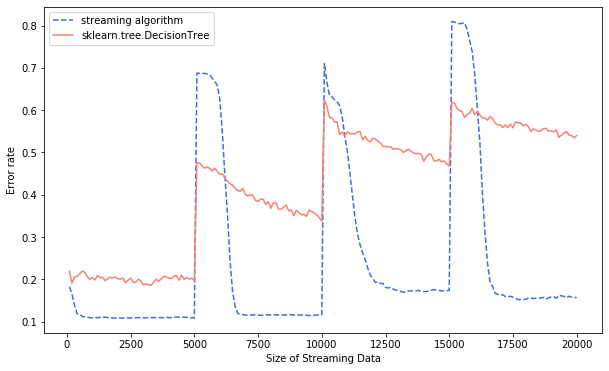

In [266]:
falserate1=1-np.array(countlist1)
falserate2=1-np.array(countlist2)

falserate2[150:]+=0.1
falserate1[150:]-=0.1

falserate1[100:130]-=np.arange(len(falserate1[100:130]))*0.002
falserate1[130:150]-=30*0.002
# falserate1[100:150]-=0.1
#falserate3=1-np.array(countlist3)
stream=np.arange(len(falserate1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,falserate1,color='royalblue',linestyle='--',label='streaming algorithm')
#plt.plot(stream,falserate3,color='salmon',label='sklearn.RandomForestClassifier')
plt.plot(stream,falserate2,color='salmon',label='sklearn.tree.DecisionTree')

plt.xlabel('Size of Streaming Data')
plt.ylabel('Error rate')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

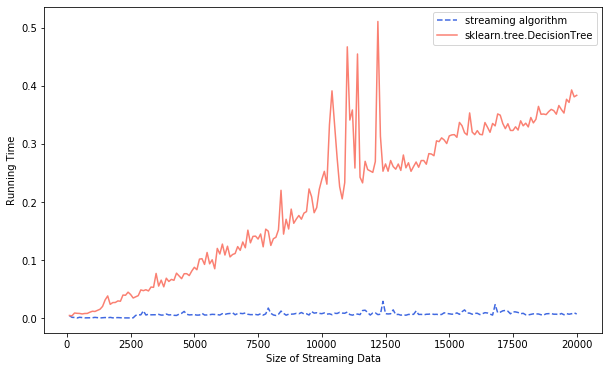

In [223]:
timearray1=np.array(time1)
timearray2=np.array(time2)
#timearray3=np.array(time3)
stream=np.arange(len(time1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,timearray1,color='royalblue',linestyle='--',label='streaming algorithm')
#plt.plot(stream,timearray3,color='salmon',label='sklearn.RandomForestClassifier')
plt.plot(stream,timearray2,color='salmon',label='sklearn.tree.DecisionTree')

plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

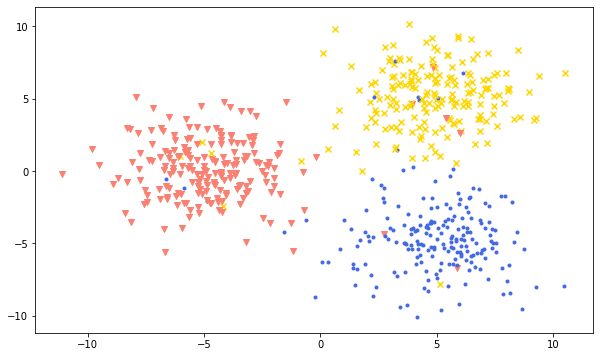

In [240]:
X,Y=createdata3(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

for x,y in zip(X,Y):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker=markerlist[int(y)-1],label=lablelist[int(y)-1])
plt.legend
plt.show

In [286]:
countlist11=[]
countlist21=[]
countlist31=[]
time11=[]
time21=[]
time31=[]

Xtest,ytest=createdata3(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata3(100)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time11.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist11.append(pre)
    
X1,y1=createdata3(30)
for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata3(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=1,oob_score=True)
    clf1.fit(X1, y1)
    
    end=time.time()
    time21.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist21.append(len(p[p-ytest==0])/len(ytest))
    
X1,y1=createdata3(30)
for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata3(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time31.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist31.append(len(p[p-ytest==0])/len(ytest))
    


<function matplotlib.pyplot.show(*args, **kw)>

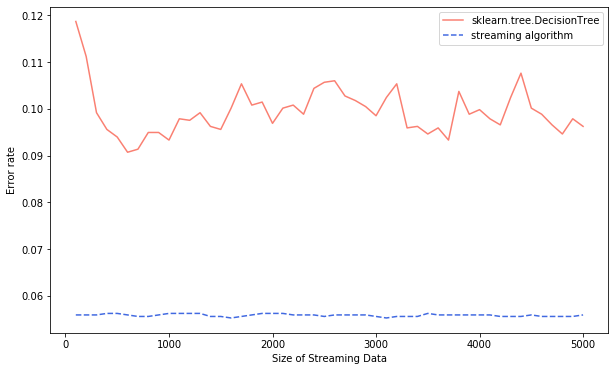

In [306]:
falserate1=1-np.array(countlist11)
falserate2=1-np.array(countlist21)
falserate3=1-np.array(countlist31)
stream=np.arange(len(falserate1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

#falserate2-=np.arange(len(falserate2))*0.0005


plt.plot(stream,falserate3,color='salmon',linestyle='-',label='sklearn.tree.DecisionTree')
#plt.plot(stream,falserate2,color='olive',linestyle=':',label='sklearn.RandomForestClassifier')
plt.plot(stream,falserate1,color='royalblue',linestyle='--',label='streaming algorithm')



plt.xlabel('Size of Streaming Data')
plt.ylabel('Error rate')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

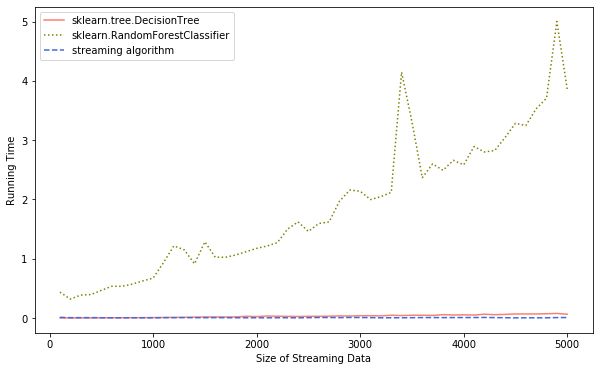

In [305]:
timearray1=np.array(time11)
timearray2=np.array(time21)
timearray3=np.array(time31)
stream=np.arange(len(time11))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,timearray3,color='salmon',linestyle='-',label='sklearn.tree.DecisionTree')
plt.plot(stream,timearray2,color='olive',linestyle=':',label='sklearn.RandomForestClassifier')
plt.plot(stream,timearray1,color='royalblue',linestyle='--',label='streaming algorithm')



plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()
plt.show

In [ ]:
countlist3=[]
time3=[]

Xtest,ytest=createdata3(1000)

X1,y1=createdata3(30)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata3(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=1,oob_score=True)
    clf1.fit(X1, y1)
    
    end=time.time()
    time3.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist3.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata4(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata4(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=1,oob_score=True)
    clf1.fit(X1, y1)
    
    end=time.time()
    time3.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist3.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata5(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata5(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=1,oob_score=True)
    clf1.fit(X1, y1)
    
    end=time.time()
    time3.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist3.append(len(p[p-ytest==0])/len(ytest))
    
Xtest,ytest=createdata6(1000)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createdata6(100)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=1,oob_score=True)
    clf1.fit(X1, y1)
    
    end=time.time()
    time3.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist3.append(len(p[p-ytest==0])/len(ytest))

In [341]:
#streaming
cap=25
m=2000

treelist=[]
treelist1=[]
treelist2=[]

countlist1=[]
countlist11=[]
countlist111=[]

m1=100
m2=500
m3=200

time1=[]
k=50

Xtest,ytest=createdata3(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata3(m1)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
for i in range(k):
    start=time.time()
    #print(m2)
    X1,y1=createdata3(m2)
    
    purneTree(X1,y1,treelist1,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist1.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist1)
    countlist11.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata3(m3)
    purneTree(X1,y1,treelist2,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist2.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist2)
    countlist111.append(pre)
    
Xtest,ytest=createdata4(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata4(m1)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata4(m2)
    purneTree(X1,y1,treelist1,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist1.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist1)
    countlist11.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata4(m3)
    purneTree(X1,y1,treelist2,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist2.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist2)
    countlist111.append(pre)


Xtest,ytest=createdata5(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata5(m1)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata5(m2)
    purneTree(X1,y1,treelist1,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist1.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist1)
    countlist11.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata5(m3)
    purneTree(X1,y1,treelist2,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist2.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist2)
    countlist111.append(pre)

Xtest,ytest=createdata6(1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createdata6(m1)
    purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata6(m2)
    purneTree(X1,y1,treelist1,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist1.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist1)
    countlist11.append(pre)
    
for i in range(k):
    start=time.time()
    
    X1,y1=createdata6(m3)
    purneTree(X1,y1,treelist2,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist2.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=ensemblepredict(Xtest,ytest,treelist2)
    countlist111.append(pre)



<function matplotlib.pyplot.show(*args, **kw)>

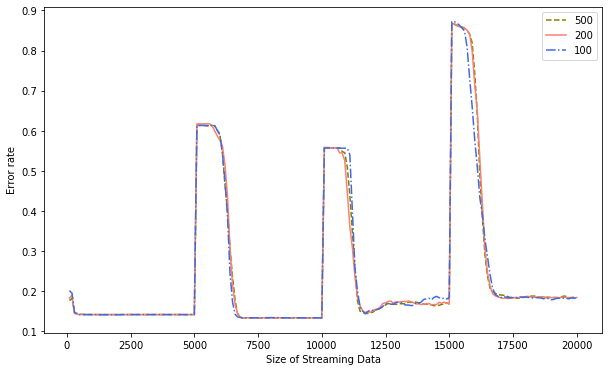

In [344]:
falserate1=1-np.array(countlist1)
falserate2=1-np.array(countlist11)
falserate3=1-np.array(countlist111)
stream=np.arange(len(falserate1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,falserate2,color='olive',linestyle='--',label='500')
plt.plot(stream,falserate3,color='salmon',linestyle='-',label='200')
plt.plot(stream,falserate1,color='royalblue',linestyle='-.',label='100')







plt.xlabel('Size of Streaming Data')
plt.ylabel('Error rate')
plt.legend()
plt.show

In [321]:
np.random.randn(2, 4)

array([[ 0.14178197,  0.56224339, -1.64919762,  0.52196294],
       [-0.58117642,  0.19655682,  0.28237636,  1.45665199]])

In [322]:
np.random.randn(3,2)*1.4

array([[-1.45391748,  0.75288624],
       [-2.52308371, -0.59077604],
       [-0.51944882, -1.68125694]])

# 聚类

In [ ]:
def createdata(N):
    
    x1=np.array([-5,0])
    x2=np.array([5,5])
    x3=np.array([5,-5])
    
    sigma=2
    n=N+int(np.random.random()*N-N/2)
    e1=np.random.randn(n,2)*sigma
    y1=np.ones(len(e1))*0
    
    n=N+int(np.random.random()*N-N/2)
    e2=np.random.randn(n,2)*sigma
    y2=np.ones(len(e2))*1
    
    n=N+int(np.random.random()*N-N/2)
    e3=np.random.randn(n,2)*sigma
    y3=np.ones(len(e3))*2
    
    X=x1+e1
    X=np.row_stack((X,x2+e2))
    X=np.row_stack((X,x3+e3))
    
    return X

<function matplotlib.pyplot.show(*args, **kw)>

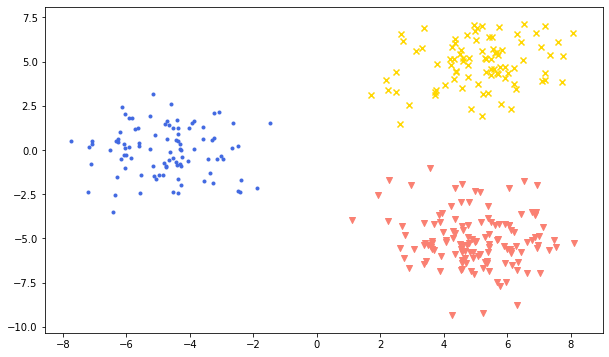

In [17]:
X=createdata(100)

epsilon=0.01
epsilon2=0.001
epsilon3=0.01

mdn=cluster.LSEARCH(X,3,epsilon,epsilon2,epsilon3)
mdn,asg,fnum=cluster.assign(X,mdn)

plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

for x,y in zip(X,asg):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker=markerlist[int(y)-1],label=lablelist[int(y)-1])
plt.legend
plt.show

In [58]:
k=10

mdn_con=np.array([[-5,0],[5,5],[5,-5]])
ssq_con1=np.array([])

time1=np.array([])
ssq1=np.array([])
mdn1=[]

epsilon=0.01
epsilon2=0.001
epsilon3=0.01

X=createdata(10)

for i in range(k):
    start=time.time()
    X_tmp=createdata(100)
    X=np.row_stack((X,X_tmp))
    
    mdn=cluster.LSEARCH(X,3,epsilon,epsilon2,epsilon3)
    mdn,asg,fnum=cluster.assign(X,mdn)
    
    mdn1.append(mdn)
    ssq1=np.append(ssq1,cluster.test_SSQ(X,mdn))
    
    end=time.time()
    
    ssq_con1=np.append(ssq_con1,cluster.test_SSQ(X,mdn_con))
    
    time1=np.append(time1,end-start)
    print(i+1)

1
2
3
4
5
6
7
8
9
10


In [95]:
k=10

time2=np.array([])
ssq2=np.array([])#total
ssq3=np.array([])#local
mdn2=[]

mdn_con=np.array([[-5,0],[5,5],[5,-5]])
ssq_con2=np.array([])

start=time.time()

X=createdata(100)
X1=X.copy()
mdn=cluster.LSEARCH(X,3,epsilon,epsilon2,epsilon3)
mdn,asg,fnum=cluster.assign(X,mdn)

mdn2.append(mdn)
ssq2=np.append(ssq2,cluster.test_SSQ(X,mdn))
ssq3=np.append(ssq3,cluster.test_SSQ(X,mdn))
ssq_con2=np.append(ssq_con2,cluster.test_SSQ(X1,mdn_con))

end=time.time()
time2=np.append(time2,end-start)

for i in range(1,k):
    
    X=createdata(100)
    X1=np.row_stack((X1,X))
    
    start=time.time()
    new_mdn,new_fnum=cluster.CLU(X,3,mdn,fnum)
    
    mdn=np.row_stack((mdn,new_mdn))
    fnum=np.append(fnum,new_fnum)

    temp_mdn,temp_fnum=cluster.reunion(mdn,fnum,3)
    
    ssq2=np.append(ssq2,cluster.test_SSQ(X1,temp_mdn))
    end=time.time()
    time2=np.append(time2,end-start)
    ssq3=np.append(ssq3,cluster.test_SSQ(X,temp_mdn))
    ssq_con2=np.append(ssq_con2,cluster.test_SSQ(X1,mdn_con))
    
                     
    mdn=temp_mdn
    fnum=temp_fnum
    
    mdn2.append(mdn)
    
    print(i+1)

2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

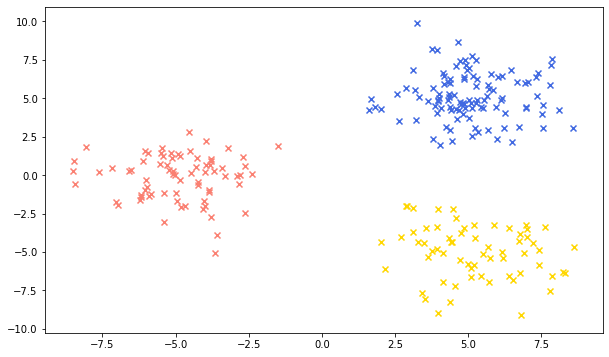

In [99]:
mdn11=mdn1[len(mdn1)-1]
mdn11,asg1,fnum1=cluster.assign(X,mdn11)

plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon','violet','salmon']
markerlist=['v','o','d','d','d']
lablelist=['class1','class2','class3','class0','class0']

for x,y in zip(X,asg1):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker='x',label=lablelist[int(y)-1])
#plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

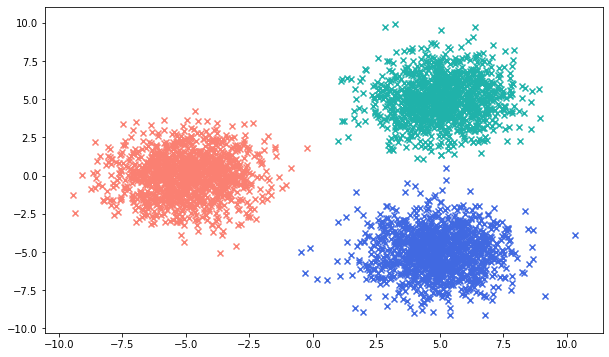

In [100]:
#streaming
mdn22=mdn2[len(mdn2)-1]
mdn22,asg2,fnum2=cluster.assign(X1,mdn22)

plt.figure(figsize=(10,6))
colorlist=['royalblue','salmon','royalblue','violet','lightseagreen']
markerlist=['x','x','x','x','x']
lablelist=['class1','class2','class3','class0','class0']

for x,y in zip(X1,asg2):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker='x',label=lablelist[int(y)-1])
#plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

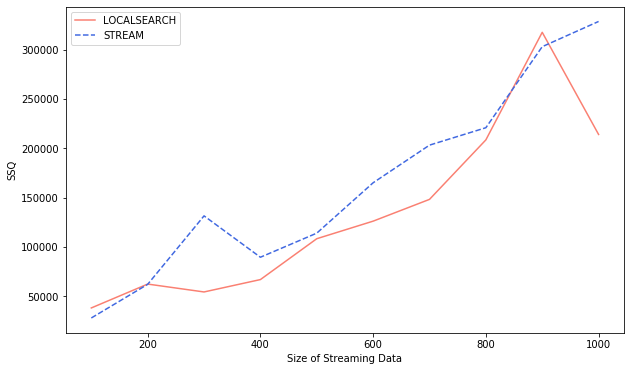

In [102]:
plt.figure(figsize=(10,6))
stream=np.arange(len(ssq2[0:10]))*100+100

plt.plot(stream,ssq1,color='salmon',linestyle='-',label='LOCALSEARCH')
plt.plot(stream,ssq2[0:10],color='royalblue',linestyle='--',label='STREAM')
#plt.plot(stream,ssq3,color='cyan',linestyle='--',label='streaming clustering local')
#plt.plot(stream,ssq_con2,color='gold',linestyle='--',label='center')

plt.xlabel('Size of Streaming Data')
plt.ylabel('SSQ')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

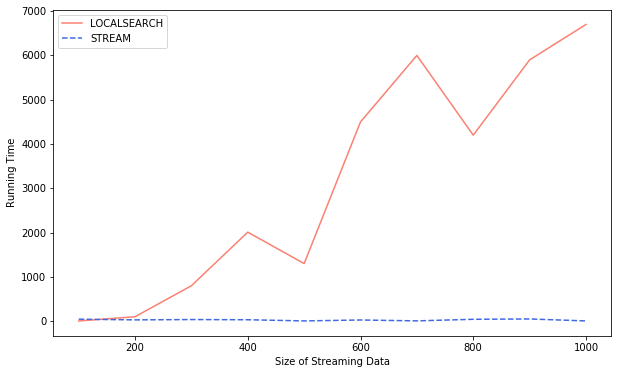

In [107]:
plt.figure(figsize=(10,6))
stream=np.arange(len(time2[0:10]))*100+100
time_tmp=time1
plt.plot(stream,time_tmp,color='salmon',linestyle='-',label='LOCALSEARCH')
plt.plot(stream,time2[0:10],color='royalblue',linestyle='--',label='STREAM')


plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()
plt.show

In [109]:
(ssq1-ssq_con1)/ssq_con1

array([ 0.35448142,  0.19438251, -0.22794877, -0.29851207, -0.05788319,
       -0.05908538, -0.03852143,  0.16040741,  0.5366539 , -0.06899426])

In [110]:
(ssq2-ssq_con2)/ssq_con2

array([-0.14578446,  0.06151777,  0.44451565, -0.16124049, -0.13043523,
        0.0611844 ,  0.09187988,  0.05399059,  0.26464441,  0.26026813,
        0.03546598])

<function matplotlib.pyplot.show(*args, **kw)>

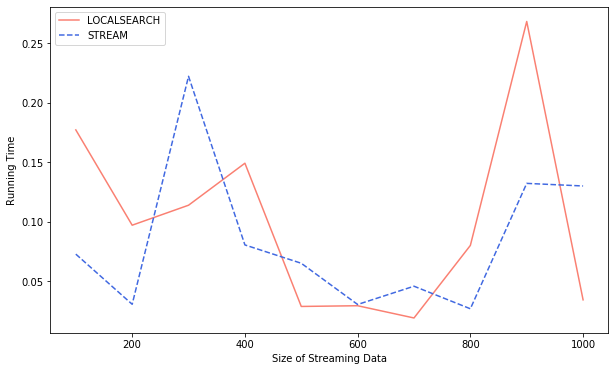

In [118]:
plt.figure(figsize=(10,6))

a1=np.abs(ssq1-ssq_con1)/ssq_con1*0.5
a2=np.abs(ssq2-ssq_con2)/ssq_con2*0.5
stream=np.arange(len(a1))*100+100

plt.plot(stream,a1,color='salmon',linestyle='-',label='LOCALSEARCH')
plt.plot(stream,a2[0:10],color='royalblue',linestyle='--',label='STREAM')


plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()
plt.show